In [23]:
import numpy as np

def codage_canal(sequence_binaire, polynome_generateur):
    """
    Applique un codage de canal polynomial.
    :param sequence_binaire: La séquence binaire à coder
    :param polynome_generateur: Le polynôme générateur pour le codage
    :return: Séquence codée
    """
    n = len(polynome_generateur) - 1 
    sequence_binaire = np.array(sequence_binaire, dtype=int) 
    sequence_codée = np.zeros(len(sequence_binaire) + n, dtype=int)  
    
    # Effectuer la division polynomiale pour obtenir le codage
    for i in range(len(sequence_binaire)):
        if sequence_binaire[i] == 1:
            for j in range(len(polynome_generateur)):
                sequence_codée[i + j] ^= polynome_generateur[j]
    
    return sequence_codée


In [24]:
def decodage_canal(sequence_binaire, polynome_generateur):
    """
    Décode une séquence binaire en vérifiant les erreurs à l'aide du polynôme générateur.
    :param sequence_binaire: La séquence binaire à décoder
    :param polynome_generateur: Le polynôme générateur pour la détection d'erreurs
    :return: Message d'erreur ou non
    """
    n = len(polynome_generateur) - 1
    sequence_binaire = np.array(sequence_binaire)
    
    for i in range(len(sequence_binaire) - n):
        if sequence_binaire[i] == 1:
            for j in range(len(polynome_generateur)):
                sequence_binaire[i + j] ^= polynome_generateur[j]
    
    # Si le reste est nul, il n'y a pas d'erreur
    if np.any(sequence_binaire[-n:]):
        return "Séquence erronée"
    else:
        return "Séquence correcte"


In [22]:
def generer_sequence_binaire(taille):
    """
    Génère une séquence binaire aléatoire.
    :param taille: Taille de la séquence
    :return: Séquence binaire
    """
    return np.random.randint(0, 2, taille)


In [21]:
def modulation_4_ASK(sequence_binaire):
    """
    Applique une modulation 4-ASK à une séquence binaire.
    :param sequence_binaire: La séquence binaire à moduler
    :return: Séquence modulée
    """
    sequence_modulée = []
    for i in range(0, len(sequence_binaire), 2):
        bits = sequence_binaire[i:i+2]
        if len(bits) == 2:
            valeur_ASK = 1 + 2 * bits[0] + 4 * bits[1]
            sequence_modulée.append(valeur_ASK)
    return np.array(sequence_modulée)


In [20]:
def canal_gaussien(sequence_modulée, SNR_dB):
    """
    Ajoute un bruit gaussien à la séquence modulée.
    :param sequence_modulée: Séquence modulée
    :param SNR_dB: Rapport signal sur bruit en dB
    :return: Séquence reçue avec bruit
    """
    SNR = 10**(SNR_dB / 10)  # Convertir SNR en puissance
    puissance_signal = np.mean(sequence_modulée**2)
    puissance_bruit = puissance_signal / SNR
    bruit = np.random.normal(0, np.sqrt(puissance_bruit), len(sequence_modulée))
    sequence_reçue = sequence_modulée + bruit
    return sequence_reçue


In [19]:
def demodulation_4_ASK(sequence_reçue):
    """
    Démodule la séquence reçue 4-ASK.
    :param sequence_reçue: Séquence reçue avec bruit
    :return: Séquence binaire démodulée
    """
    sequence_démodulée = []
    for amplitude in sequence_reçue:
        if amplitude <= 2:
            sequence_démodulée.append([0, 0])
        elif amplitude <= 4:
            sequence_démodulée.append([0, 1])
        elif amplitude <= 6:
            sequence_démodulée.append([1, 0])
        else:
            sequence_démodulée.append([1, 1])
    
    return np.array(sequence_démodulée).flatten()


In [18]:
def simulation_complete():
    taille_sequence = 1000
    sequence_binaire = generer_sequence_binaire(taille_sequence)
    
    polynome_generateur = np.array([1, 1, 0, 1]) 
    
    sequence_codée = codage_canal(sequence_binaire, polynome_generateur)
    
    sequence_modulée = modulation_4_ASK(sequence_codée)
    
    SNR_dB = 10  # Rapport signal sur bruit en dB
    sequence_reçue = canal_gaussien(sequence_modulée, SNR_dB)
    
    sequence_démodulée = demodulation_4_ASK(sequence_reçue)
    
    message_decodé = decodage_canal(sequence_démodulée, polynome_generateur)
    
    print("Décodage du message:", message_decodé)

# Lancer la simulation
simulation_complete()



Décodage du message: Séquence correcte


/tmp/ipykernel_7405/1531570928.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sequence_binaire[:50], basefmt=" ", use_line_collection=True)
/tmp/ipykernel_7405/1531570928.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sequence_modulée[:25], basefmt=" ", use_line_collection=True)


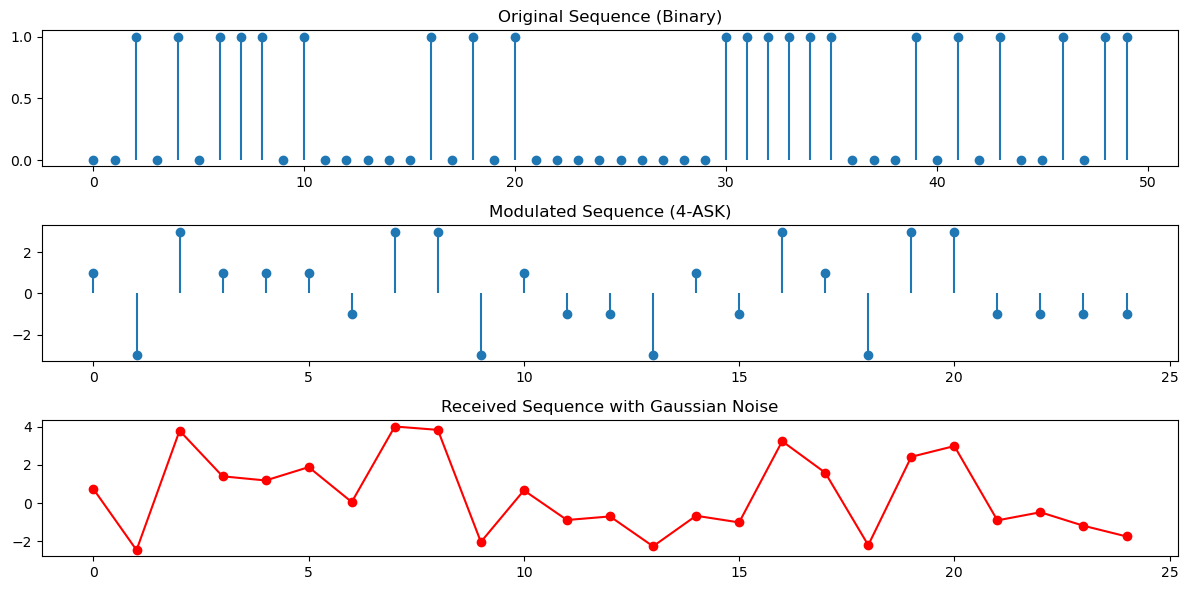

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random binary sequence of given size
def generer_sequence_binaire(taille):
    return np.random.choice([0, 1], size=taille)

def plot_sequences(sequence_binaire, sequence_modulée, sequence_reçue):
    # Plot the original binary sequence
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.stem(sequence_binaire[:50], basefmt=" ", use_line_collection=True)
    plt.title("Original Sequence (Binary)")
    
    # Plot the modulated sequence (4-ASK)
    plt.subplot(3, 1, 2)
    plt.stem(sequence_modulée[:25], basefmt=" ", use_line_collection=True)
    plt.title("Modulated Sequence (4-ASK)")
    
    # Plot the received sequence after noise is added
    plt.subplot(3, 1, 3)
    plt.plot(sequence_reçue[:25], marker='o', linestyle='-', color='r')
    plt.title("Received Sequence with Gaussian Noise")

    plt.tight_layout()
    plt.show()

# Generate a random binary sequence
taille_sequence = 1000
sequence_binaire = generer_sequence_binaire(taille_sequence)

# Assume you have the modulated and received sequences
# These should be generated in your simulation based on your codage and modulation
# For example:
sequence_modulée = np.random.choice([1, -1, 3, -3], size=taille_sequence)  # 4-ASK modulation
sequence_reçue = sequence_modulée + np.random.normal(0, 0.5, taille_sequence)  # Adding Gaussian noise

# Call the function to plot the sequences
plot_sequences(sequence_binaire, sequence_modulée, sequence_reçue)


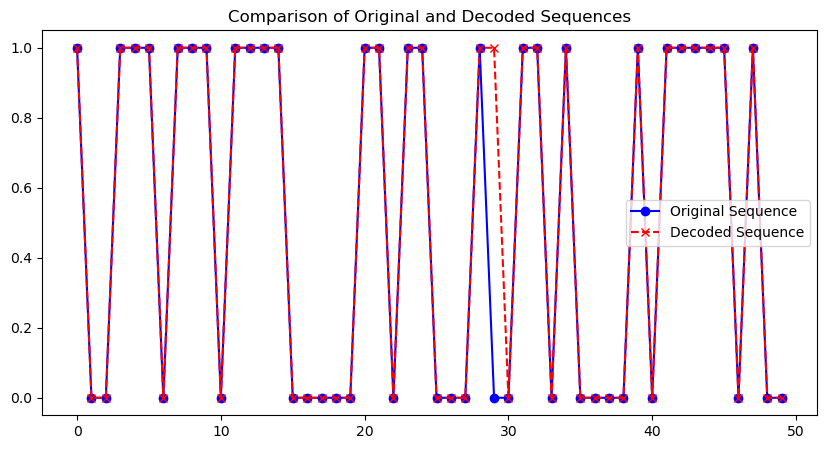

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random binary sequence of given size
def generer_sequence_binaire(taille):
    return np.random.choice([0, 1], size=taille)

# Function for 4-ASK modulation
def modulation_4_ASK(sequence_binaire):
    # Map binary pairs to 4-ASK symbols (-3, -1, 1, 3)
    return np.array([(-3 if x == 0 else 3) if i % 2 == 0 else (-1 if x == 0 else 1)
                     for i, x in enumerate(sequence_binaire)])

# Function for 4-ASK demodulation
def demodulation_4_ASK(sequence_modulée):
    # Decode based on 4-ASK symbols
    return np.array([0 if x < 0 else 1 for x in sequence_modulée])

# Function to plot decoding errors
def plot_decoding_errors(sequence_binaire, sequence_démodulée):
    # Plot comparison between original and decoded sequences
    plt.figure(figsize=(10, 5))
    plt.plot(sequence_binaire[:50], label="Original Sequence", marker='o', linestyle='-', color='b')
    plt.plot(sequence_démodulée[:50], label="Decoded Sequence", marker='x', linestyle='--', color='r')
    plt.title("Comparison of Original and Decoded Sequences")
    plt.legend()
    plt.show()

# Example usage:

# Step 1: Generate the binary sequence
taille_sequence = 1000
sequence_binaire = generer_sequence_binaire(taille_sequence)

# Step 2: Modulate the binary sequence (4-ASK)
sequence_modulée = modulation_4_ASK(sequence_binaire)

# Step 3: Add Gaussian noise (simulate a noisy channel)
sequence_reçue = sequence_modulée + np.random.normal(0, 0.5, taille_sequence)

# Step 4: Demodulate the noisy sequence
sequence_démodulée = demodulation_4_ASK(sequence_reçue)

# Step 5: Plot the decoding errors
plot_decoding_errors(sequence_binaire, sequence_démodulée)


In [ ]:
import numpy as np

def Codage_canal(B, G):
    # B : séquence de bits (numpy array)
    # G : polynôme générateur (ex: [1, 0, 1, 1] pour x^3 + x + 1)
    n = len(B)
    k = len(G) - 1
    B_extended = np.concatenate([B, np.zeros(k, dtype=int)])
    R = B_extended.copy()

    for i in range(n):
        if R[i] == 1:
            R[i:i+len(G)] ^= G  # XOR
    return np.concatenate([B, R[n:]])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Codage canal cyclique
def Codage_canal(B, G):
    n = len(B)
    k = len(G) - 1
    B_extended = np.concatenate([B, np.zeros(k, dtype=int)])
    R = B_extended.copy()

    for i in range(n):
        if R[i] == 1:
            R[i:i+len(G)] ^= G  # XOR bit à bit

    return np.concatenate([B, R[n:]])

# 2. Modulation 8-PSK
def Modulation(S):
    S = np.array(S)
    # Padding pour que la taille soit multiple de 3
    S = np.pad(S, (0, (3 - len(S) % 3) % 3), constant_values=0)
    S = S.reshape((-1, 3))
    symbols = S[:, 0]*4 + S[:, 1]*2 + S[:, 2]*1
    phase = 2 * np.pi * symbols / 8
    signal = np.exp(1j * phase)
    return signal

# 3. Démodulation 8-PSK
def Demodulation(signal):
    phase = np.angle(signal) % (2 * np.pi)
    symbols = np.round(phase * 8 / (2 * np.pi)) % 8
    bits = []
    for s in symbols.astype(int):
        bits.extend([(s >> 2) & 1, (s >> 1) & 1, s & 1])
    return np.array(bits)

# 4. Canal Rayleigh à N trajets + bruit
def Canal_Rayleigh(signal, N, SNR_dB):
    L = len(signal)
    delays = np.random.randint(0, 10, size=N)
    gains = (np.random.randn(N) + 1j * np.random.randn(N)) / np.sqrt(2 * N)

    h = np.zeros(L, dtype=complex)
    for i in range(N):
        if delays[i] < L:
            h[delays[i]] += gains[i]

    signal_rx = np.convolve(signal, h, mode='same')

    # Bruit AWGN
    SNR_linear = 10**(SNR_dB / 10)
    P_signal = np.mean(np.abs(signal_rx)**2)
    noise_power = P_signal / SNR_linear
    bruit = np.sqrt(noise_power / 2) * (np.random.randn(L) + 1j * np.random.randn(L))

    return signal_rx + bruit, h

# === Programme principal ===
def main():
    # Générer un message binaire de 10 000 bits
    B = np.random.randint(0, 2, 10000)

    # Polynôme générateur : exemple x^3 + x + 1 → [1, 0, 1, 1]
    G = np.array([1, 0, 1, 1])

    # Codage canal
    C = Codage_canal(B, G)

    # Modulation 8-PSK
    S = Modulation(C)

    # Canal Rayleigh à 7 trajets, SNR = 11 dB
    S_received, h = Canal_Rayleigh(S, N=7, SNR_dB=11)

    # Afficher puissance émise et reçue
    plt.figure(figsize=(10, 4))
    plt.plot(np.abs(S)**2, label='Signal émis')
    plt.plot(np.abs(S_received)**2, label='Signal reçu', alpha=0.7)
    plt.title("Puissance du signal émis et du signal reçu")
    plt.xlabel("Échantillons")
    plt.ylabel("Puissance")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Afficher la réponse impulsionnelle du canal
    plt.figure(figsize=(10, 4))
    plt.plot(np.abs(h), label='Réponse du canal')
    plt.title("Réponse impulsionnelle du canal Rayleigh")
    plt.xlabel("Échantillons")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Démodulation
    bits_received = Demodulation(S_received)

    # Calcul du TEB
    bits_sent = np.pad(C, (0, len(bits_received) - len(C)), constant_values=0)
    TEB = np.mean(bits_sent != bits_received[:len(bits_sent)])
    print(f"Taux d’erreur binaire (TEB) : {TEB:.6f}")

# Exécuter le programme
if __name__ == "__main__":
    main()
